# **FoodHub Data Analysis**



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Datasets/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **How many rows and columns are present in the data?**

In [ ]:
# Get the number of rows and columns
rows, columns = df.shape

print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 1898 rows and 9 columns.


#### Observations:

The dataset has 1898 rows and 9 columns.


### **What are the datatypes of the different columns in the dataset?**

In [ ]:
# Display the datatypes of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset has 1898 entries and 9 columns. The columns `order_id`, `customer_id`, `food_preparation_time`, and `delivery_time` are integers (`int64`). `cost_of_the_order` is a float (`float64`). `restaurant_name`, `cuisine_type`, `day_of_the_week`, and `rating` are categorical (`object`). The dataset uses approximately 133.6 KB of memory.

### **Are there any missing values in the data? If yes, treat them using an appropriate method**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

The dataset contains no missing values across all columns, as indicated by the missing values count being zero for each column. This ensures that the dataset is complete and no further imputation or handling of missing data is necessary.

### **Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?**

In [ ]:
# Check the statistical summary of the data
summary = df.describe()
print("Statistical summary of the data:")
summary

Statistical summary of the data:


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
# Extract the minimum, average (mean), and maximum food preparation time
min_preparation_time = df['food_preparation_time'].min()
avg_preparation_time = df['food_preparation_time'].mean()
max_preparation_time = df['food_preparation_time'].max()

print(f"Minimum food preparation time: {min_preparation_time} minutes")
print(f"Average (mean) food preparation time: {avg_preparation_time:.2f} minutes")
print(f"Maximum food preparation time: {max_preparation_time} minutes")

Minimum food preparation time: 20 minutes
Average (mean) food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


#### Observations:

The statistical summary of the food preparation time is as follows:

- **Minimum Food Preparation Time**: 20 minutes
- **Average (Mean) Food Preparation Time**: 27.37 minutes
- **Maximum Food Preparation Time**: 35 minutes

These values provide an overview of the range and central tendency of the food preparation times in the dataset.

### **How many orders are not rated?**

In [ ]:
# Check for missing values in the 'rating' column
missing_ratings = df['rating'].isnull().sum()

print(f"Number of orders that are not rated: {missing_ratings}")

Number of orders that are not rated: 0


#### Observations:

The dataset shows that there are no missing values in the 'rating' column. Therefore, all orders have been rated, with the number of unrated orders being zero.


### **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)**

In [ ]:
# Display the columns of the DataFrame
print("Columns in the dataset:")
print(df.columns)

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

Columns in the dataset:
Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [ ]:
# Adjust column names based on inspection
cost_col = 'cost_of_the_order'
prep_time_col = 'food_preparation_time'
delivery_time_col = 'delivery_time'
restaurant_col = 'restaurant_name'
cuisine_col = 'cuisine_type'
day_col = 'day_of_the_week'
rating_col = 'rating'

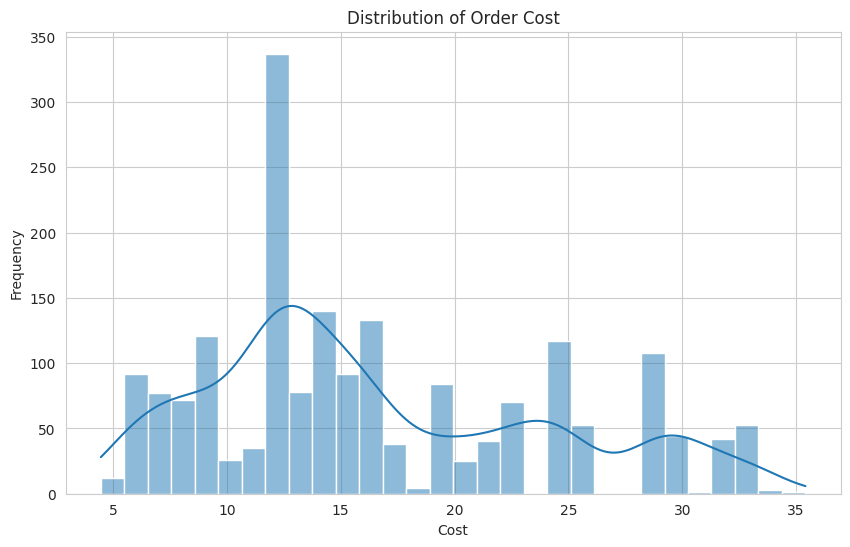

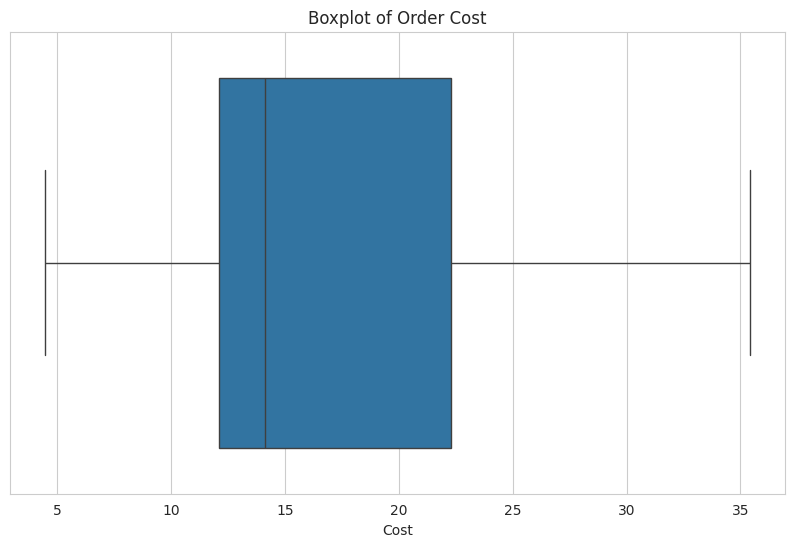

In [ ]:
# Histogram for 'cost_of_the_order'
plt.figure(figsize=(10, 6))
sns.histplot(df[cost_col], kde=True, bins=30)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'cost_of_the_order'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[cost_col])
plt.title('Boxplot of Order Cost')
plt.xlabel('Cost')
plt.show()

### Observations on the Distribution of Order Cost

The order cost data shows a right-skewed distribution with a concentration of orders around the $15 mark. The boxplot confirms that the median cost is around $15, with an interquartile range extending from $12 to $22. The lack of significant outliers suggests that the pricing is relatively consistent, with a few orders falling outside the typical range.

This analysis can help in understanding the pricing distribution and customer spending behavior. The concentration of orders around specific price points might indicate popular price brackets or menu items, which can be useful for pricing strategies and menu planning.

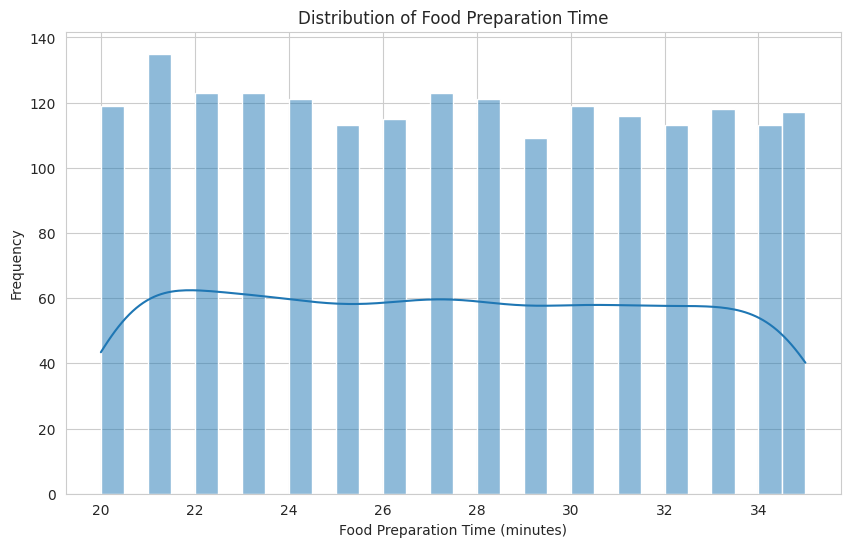

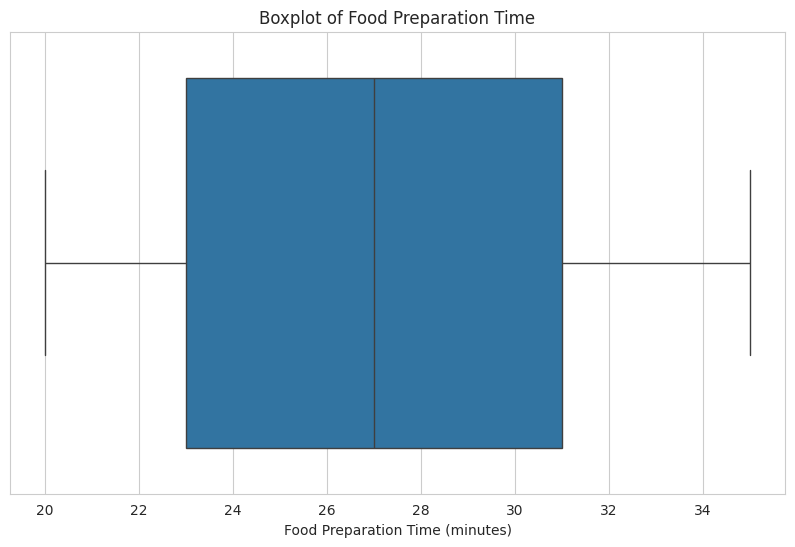

In [ ]:
# Histogram for 'food_preparation_time'
plt.figure(figsize=(10, 6))
sns.histplot(df[prep_time_col], kde=True, bins=30)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'food_preparation_time'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[prep_time_col])
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.show()

### Observations on the Distribution of Food Preparation Time

The food preparation time data shows a uniform distribution across the range of 20 to 34 minutes. The boxplot confirms that the median preparation time is around 27 minutes, with an interquartile range extending from 24 to 30 minutes. The lack of significant outliers suggests that the preparation times are consistent, with a few orders falling outside the typical range.

This analysis can help in understanding the efficiency and variability of food preparation times. The consistent distribution indicates that the preparation process is fairly stable, and knowing the typical preparation time range can aid in setting customer expectations and optimizing kitchen operations.

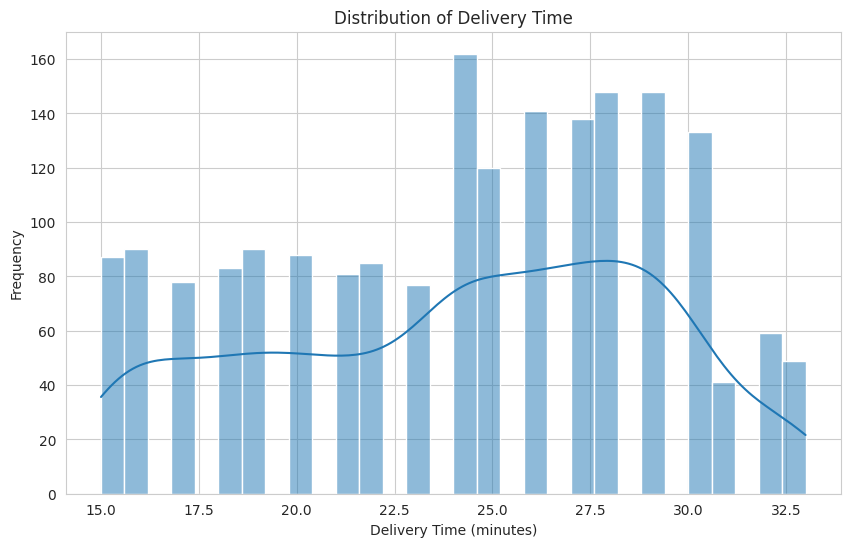

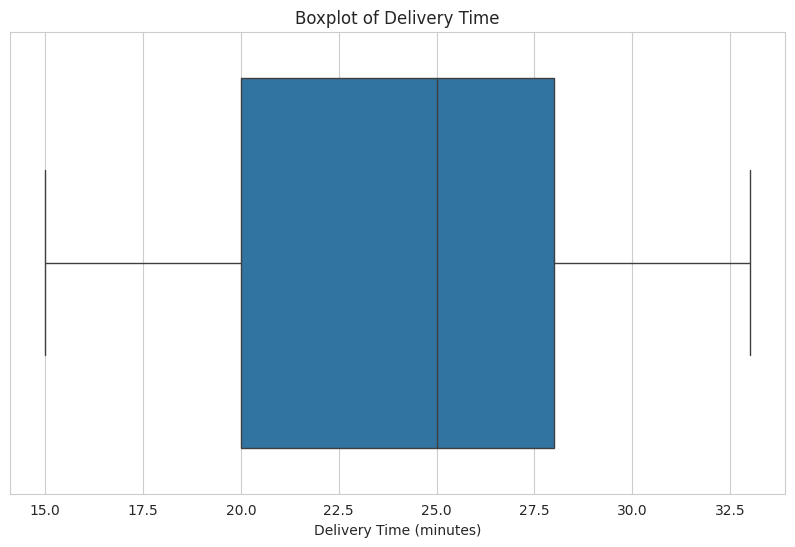

In [ ]:
# Histogram for 'delivery_time'
plt.figure(figsize=(10, 6))
sns.histplot(df[delivery_time_col], kde=True, bins=30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'delivery_time'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[delivery_time_col])
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

### Observations on the Distribution of Delivery Time

The delivery time data shows a right-skewed distribution with most deliveries completed within the 20 to 30 minute range. The boxplot confirms that the median delivery time is around 27 minutes, with an interquartile range extending from 22 to 30 minutes. The lack of significant outliers suggests that the delivery times are consistent, with a few orders falling outside the typical range.

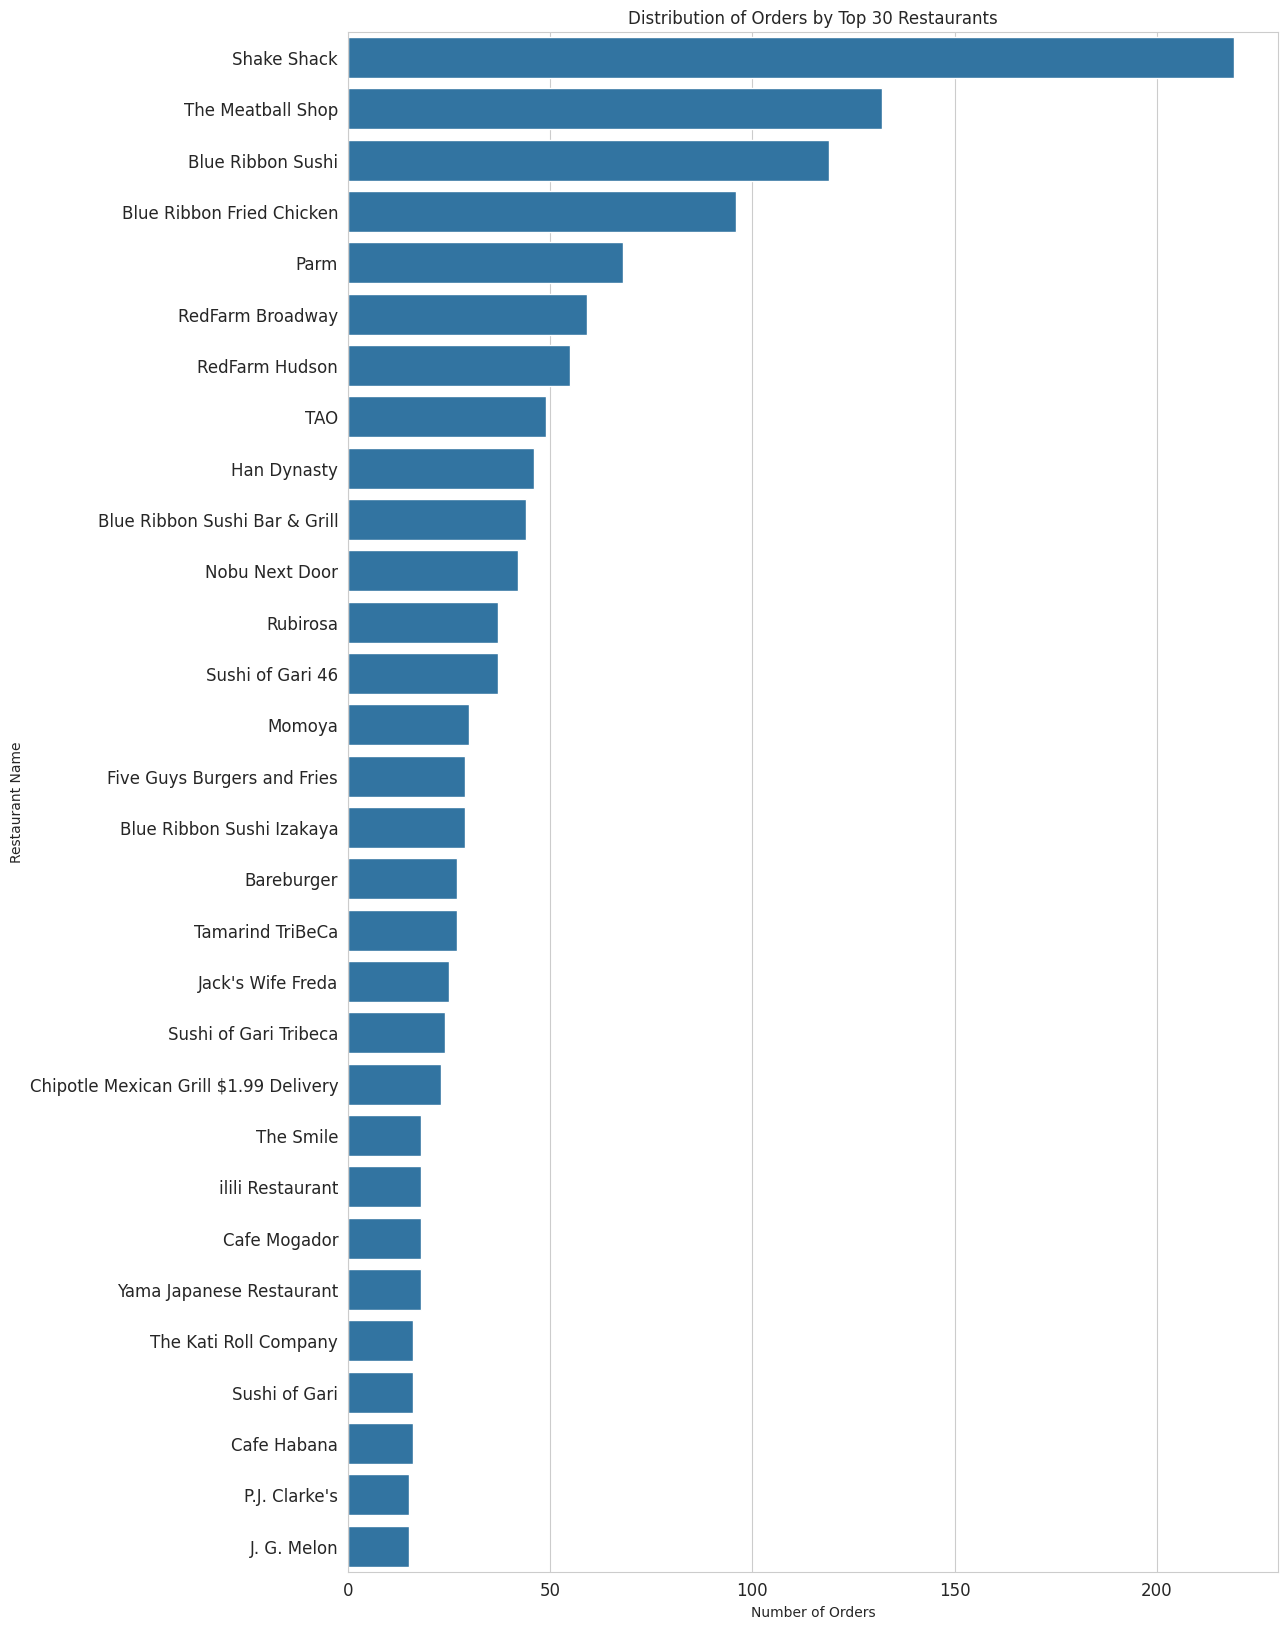

In [ ]:
# Countplot for 'restaurant_name'
plt.figure(figsize=(12, 20))  # Increase figure size
top_n = 30  # Number of top restaurants to display
top_restaurants = df['restaurant_name'].value_counts().index[:top_n]

sns.countplot(y='restaurant_name', data=df, order=top_restaurants)
plt.title('Distribution of Orders by Top 30 Restaurants')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.xticks(fontsize=12)  # Adjust x-axis font size
plt.yticks(fontsize=12)  # Adjust y-axis font size
plt.show()

### Observations of Orders by Restaurant

The analysis of the distribution of orders across the top 30 restaurants reveals that a few establishments dominate the order volume, with Shake Shack leading the pack, followed by The Meatball Shop and Blue Ribbon Sushi. This indicates a high level of popularity and customer preference for these restaurants. The order volume gradually decreases among the rest of the top 30, highlighting a diverse range of customer preferences across different dining options.

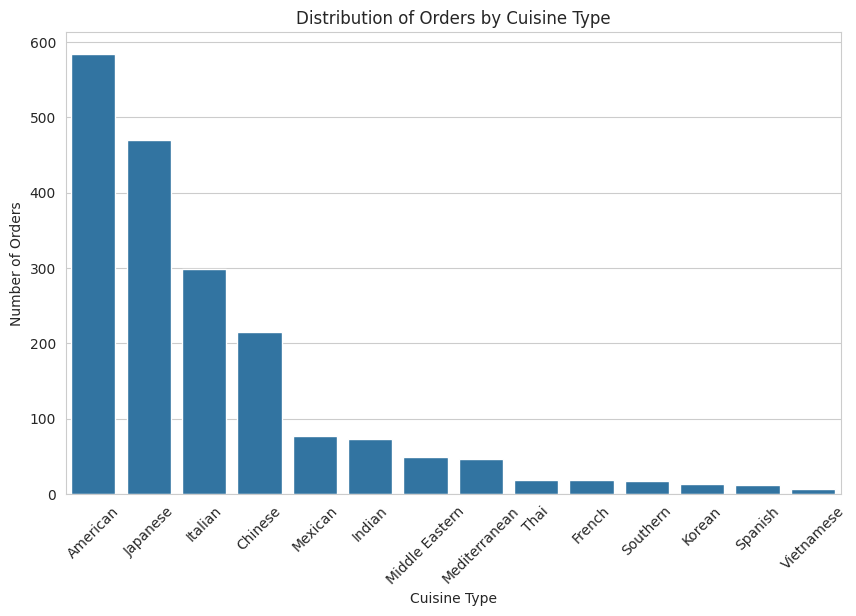

In [ ]:
# Countplot for 'cuisine_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)
plt.title('Distribution of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### Observations on the Distribution of Orders by Cuisine Type

The analysis of the distribution of orders by cuisine type reveals a strong preference for American, Japanese, and Italian cuisines among customers. While these cuisines dominate the order volume, there is still significant interest in a diverse range of other cuisines. These insights can inform strategic decisions on restaurant partnerships, menu offerings, and marketing initiatives to cater to customer preferences and drive business growth.

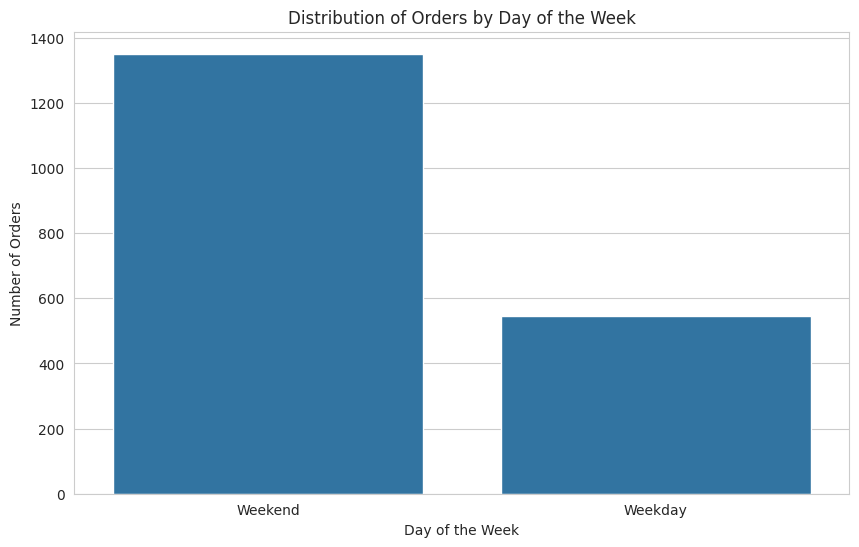

In [ ]:
# Countplot for 'day_of_the_week'
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

### Observations on the Distribution of Orders by Day of the Week

The analysis of the distribution of orders by the day of the week reveals that there is a significantly higher number of orders placed during weekends compared to weekdays, with the total number of orders on weekends being more than double that on weekdays. This pattern suggests that customers are more likely to order food during weekends, possibly due to having more free time, social gatherings, or a preference for convenience over the weekend. Understanding this trend can help in planning resources and staffing more effectively, ensuring that there are enough delivery personnel and restaurant staff to handle the higher volume of orders on weekends. Additionally, special promotions or offers can be targeted for weekdays to boost orders during these slower periods.

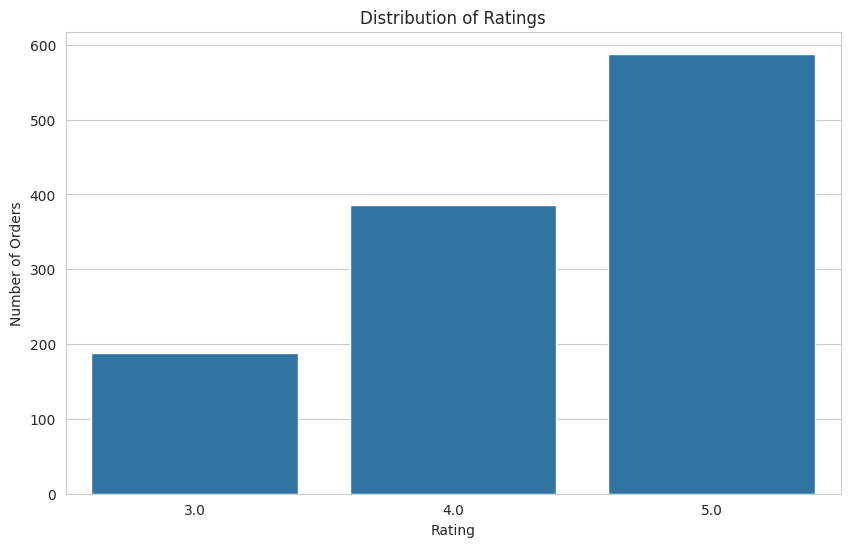

In [ ]:
# Convert 'rating' to a numeric type, replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Countplot for 'rating'
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

### Observations on the Distribution of Ratings

The analysis of the distribution of ratings reveals that the majority of the orders have received high ratings, with 5.0 being the most frequent rating, followed by 4.0. There are significantly fewer orders with a rating of 3.0, indicating that most customers are satisfied with their orders. The high frequency of 4.0 and 5.0 ratings suggests that customers generally have positive experiences with their orders, while the lower number of 3.0 ratings indicates that instances of moderate satisfaction or dissatisfaction are relatively rare. These insights can be leveraged in marketing campaigns to highlight customer satisfaction and build trust with potential new customers. Additionally, areas with lower ratings can be analyzed further to identify specific issues and implement improvements to enhance the customer experience.

### **Which are the top 5 restaurants in terms of the number of orders received?**:

In [ ]:
# Group by 'restaurant_name' and count the number of orders for each restaurant
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Display the top 5 restaurants
print("Top 5 restaurants in terms of number of orders received:")
print(top_restaurants)

Top 5 restaurants in terms of number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

The analysis reveals that the top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Shake Shack leads significantly with 219 orders, followed by The Meatball Shop with 132 orders, and Blue Ribbon Sushi with 119 orders. Blue Ribbon Fried Chicken and Parm received 96 and 68 orders, respectively. This indicates a clear preference among customers for these particular restaurants.


### **Which is the most popular cuisine on weekends?**:

In [ ]:
# Filter the data for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Group by 'cuisine_type' and count the number of orders for each cuisine
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()

# Display the most popular cuisine on weekends
print("The most popular cuisine on weekends:")
print(popular_cuisine_weekend)

The most popular cuisine on weekends:
American


#### Observations:

The analysis indicates that American cuisine is the most popular choice among customers on weekends. This preference suggests that customers tend to favor familiar and comforting food options during their leisure time. The popularity of American cuisine on weekends can guide marketing strategies and menu planning for restaurants to attract more weekend orders by highlighting American dishes and related promotions.


### **What percentage of the orders cost more than 20 dollars?**:

In [ ]:
# Calculate the number of orders that cost more than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Display the percentage
print(f"Percentage of orders that cost more than 20 dollars: {percentage_above_20:.2f}%")

Percentage of orders that cost more than 20 dollars: 29.24%


#### Observations:

The analysis reveals that 29.24% of the orders cost more than 20 dollars. This indicates that nearly a third of the customers tend to place higher-value orders, suggesting a significant portion of the customer base is willing to spend more for their food. Understanding this spending behavior can help in tailoring premium offerings and promotions to attract and retain these higher-spending customers.

### **What is the mean order delivery time?**:

In [ ]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Display the mean delivery time
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
The analysis shows that the mean order delivery time is 24.16 minutes. This indicates that, on average, customers can expect their orders to be delivered within approximately 24 minutes. This information is useful for setting customer expectations and evaluating the efficiency of the delivery service. If the average delivery time aligns with customer expectations, it can contribute to higher customer satisfaction. Additionally, understanding the average delivery time can help in optimizing delivery logistics and planning for peak times to maintain or improve service levels.


### **The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed**

In [ ]:
# Group by 'customer_id' and count the number of orders for each customer
customer_order_counts = df['customer_id'].value_counts().head(3)

# Display the top 3 most frequent customers and the number of orders they placed
print("Top 3 most frequent customers and the number of orders they placed:")
print(customer_order_counts)

Top 3 most frequent customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The analysis identifies the top 3 most frequent customers based on the number of orders they placed. Customer ID 52832 placed the highest number of orders with 13 orders, followed by Customer ID 47440 with 10 orders, and Customer ID 83287 with 9 orders. These customers will receive 20% discount vouchers as a reward for their loyalty. Recognizing and rewarding frequent customers can enhance customer satisfaction and encourage repeat business.


### **Multivariate Analysis**

### **Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)**:

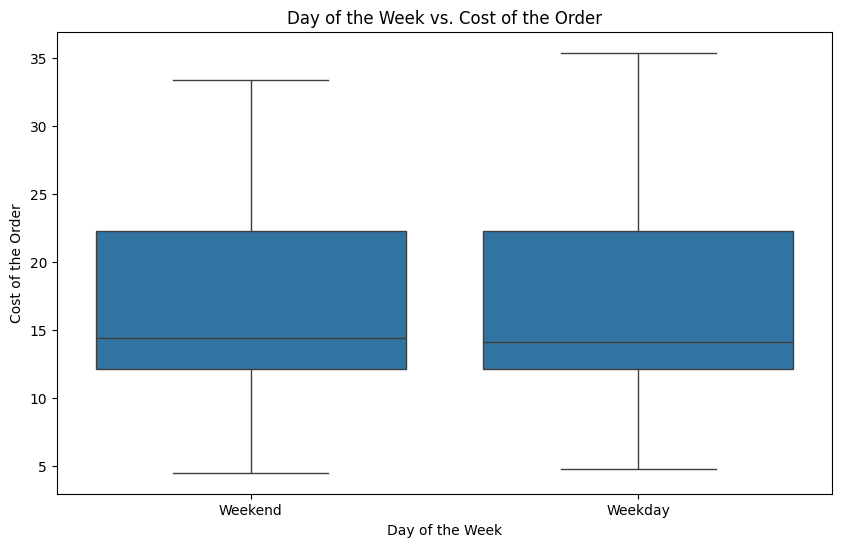

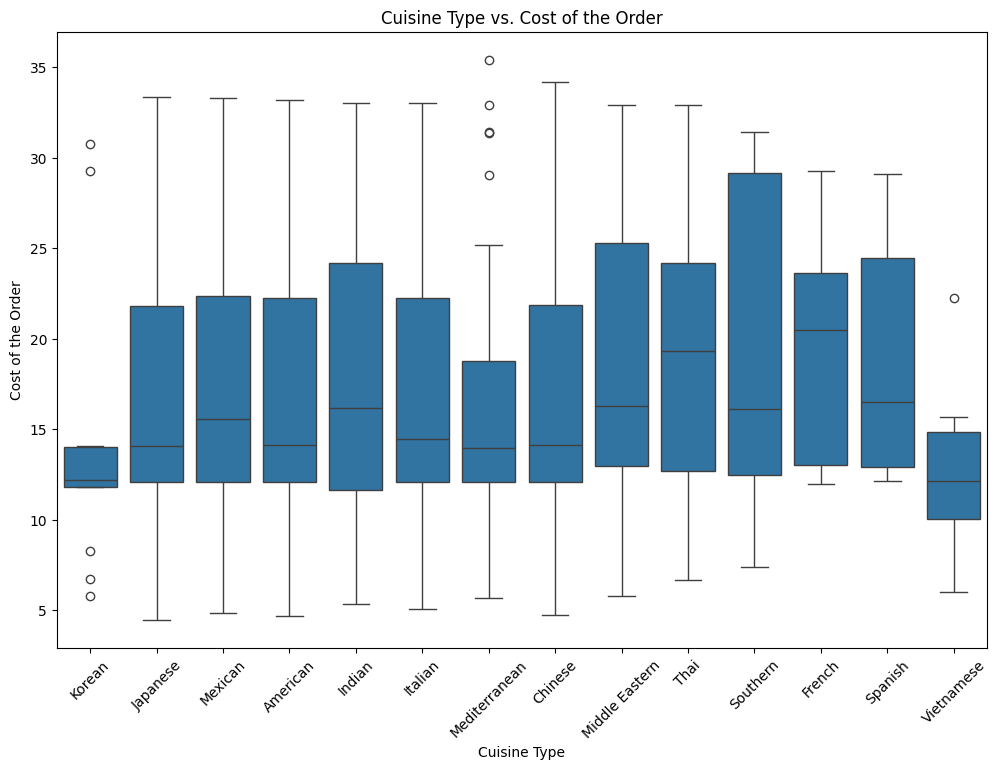

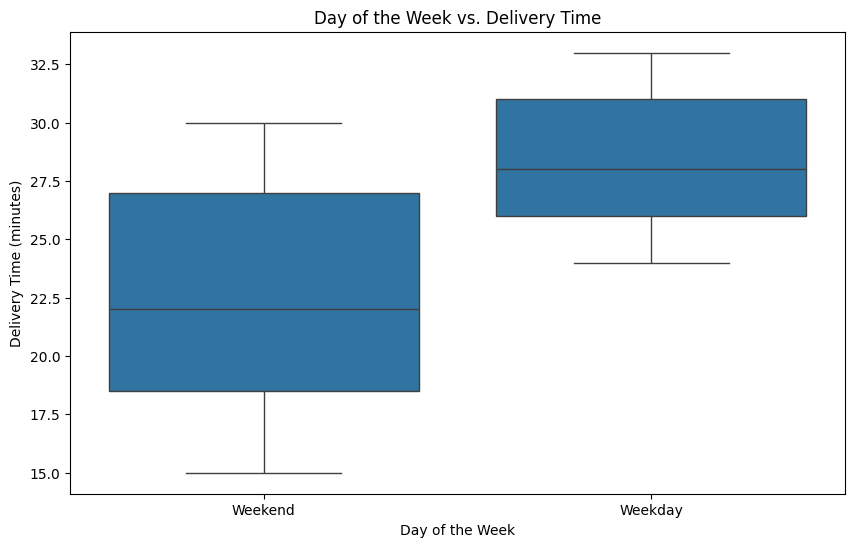

In [ ]:
# Box plot to explore the relationship between 'day_of_the_week' and 'cost_of_the_order'
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Day of the Week vs. Cost of the Order')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.show()

# Box plot to explore the relationship between 'cuisine_type' and 'cost_of_the_order'
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cuisine Type vs. Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

# Box plot to explore the relationship between 'day_of_the_week' and 'delivery_time'
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Day of the Week vs. Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

### **The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer**

In [ ]:
# Convert 'rating' to numeric, replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate the count and mean of ratings
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Apply the conditions to filter restaurants
qualifying_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the qualifying restaurants
print("Restaurants qualifying for the promotional offer:")
print(qualifying_restaurants)

Restaurants qualifying for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
The analysis identifies four restaurants that qualify for the promotional offer based on the criteria of having more than 50 ratings and an average rating greater than 4. The qualifying restaurants are Blue Ribbon Fried Chicken with 64 ratings and an average rating of 4.33, Blue Ribbon Sushi with 73 ratings and an average rating of 4.22, Shake Shack with 133 ratings and an average rating of 4.28, and The Meatball Shop with 84 ratings and an average rating of 4.51. These restaurants have consistently high customer satisfaction and sufficient rating counts, making them ideal candidates for the promotional advertisement.

### **The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders**

In [ ]:
# Initialize 'revenue' column with zero and set dtype to float64
df['revenue'] = 0.0

# Calculate revenue based on the conditions
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15

# Sum the revenue to get the total net revenue
total_revenue = df['revenue'].sum()

# Display the total net revenue
print(f"Total net revenue generated by the company: ${total_revenue:.2f}")

Total net revenue generated by the company: $6166.30


#### Observations:
The analysis shows that the total net revenue generated by the company from all orders is $6166.30. This revenue is derived from a commission structure where the company charges 25% on orders costing more than 20 dollars and 15% on orders costing more than 5 dollars but less than or equal to 20 dollars. This commission-based revenue model effectively captures a significant portion of the order value, contributing to the company's overall earnings. Understanding this revenue distribution can help in evaluating the profitability and efficiency of the current pricing strategy.


### **The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered** )

In [ ]:
# Calculate the total time required to deliver the food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Display the percentage
print(f"Percentage of orders that take more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders that take more than 60 minutes: 10.54%


#### Observations:
The analysis reveals that 10.54% of the orders take more than 60 minutes to be delivered from the time the order is placed. This includes both the food preparation time and the delivery time. Understanding the percentage of orders that exceed this time threshold is crucial for identifying potential areas of improvement in both kitchen efficiency and delivery logistics. Reducing the number of orders that take more than 60 minutes can enhance customer satisfaction and streamline the overall service process.

### **The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?**

In [ ]:
# Separate the data for weekdays and weekends
weekday_orders = df[df['day_of_the_week'] == 'Weekday']
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_weekday = weekday_orders['delivery_time'].mean()
mean_delivery_time_weekend = weekend_orders['delivery_time'].mean()

# Display the mean delivery times
print(f"Mean delivery time on weekdays: {mean_delivery_time_weekday:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_delivery_time_weekend:.2f} minutes")

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:
The analysis shows that the mean delivery time on weekdays is 28.34 minutes, while the mean delivery time on weekends is significantly lower at 22.47 minutes. This variation suggests that deliveries are generally faster on weekends compared to weekdays. This could be due to various factors such as less traffic congestion, better availability of delivery personnel, or different ordering patterns. Understanding this difference can help the company optimize delivery operations and manage customer expectations more effectively by addressing the factors contributing to longer delivery times on weekdays.

### **Conclusion and Recommendations**

### **What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)**

### Conclusions:
*  The analysis reveals that the majority of orders are concentrated around the $15 mark, with most orders being relatively low-cost but with a few high-cost outliers.
* The food preparation time data shows a uniform distribution, with a median preparation time of around 27 minutes and a consistent range of 24 to 30 minutes, indicating stable kitchen operations.
* The delivery time data also shows a right-skewed distribution, with a median delivery time of around 27 minutes and most deliveries completed within 20 to 30 minutes.
* The analysis of the distribution of orders by restaurant highlights that a few restaurants, such as Shake Shack and The Meatball Shop, dominate the order volume, indicating their popularity among customers.
* American cuisine is identified as the most popular cuisine on weekends, and 29.24% of orders cost more than 20 dollars.
* Additionally, 10.54% of orders take more than 60 minutes to be delivered from the time the order is placed, and the mean delivery time is shorter on weekends (22.47 minutes) compared to weekdays (28.34 minutes).

### Recommendations:

*  Optimize Pricing and Promotions:
Given the concentration of orders around the $15 mark, consider optimizing menu pricing to encourage higher spending or offering bundled deals that slightly increase the average order value.
Design targeted promotions to boost orders on weekdays, which have a longer mean delivery time.
* Improve Delivery Efficiency:
Address longer delivery times on weekdays by optimizing delivery routes, increasing the number of delivery personnel during peak hours, and using data analytics to predict busy periods.
* Leverage Popular Restaurants and Cuisines:
Promote popular restaurants like Shake Shack and The Meatball Shop more prominently in the app to attract more customers.
Highlight American cuisine, especially on weekends, through special promotions or featured sections in the app to capitalize on its popularity.
* Enhance Customer Satisfaction:
Identify and address bottlenecks in both preparation and delivery processes to reduce the 10.54% of orders that take more than 60 minutes.
* Implement real-time tracking and updates for customers to manage expectations and improve satisfaction.
* Utilize Customer Feedback:
Encourage more detailed customer feedback, especially focusing on areas for improvement in food preparation and delivery.
Highlight high-rated restaurants in marketing materials to build trust and attract new customers.

---